## Assignment

A retailer called SpreeMart wants to improve their service experience for their customers which have different needs from their different profiles. 

As a data scientist at SpreeMart, you are asked to develop a model in Python to divide broad customers into sub-groups of customers based on some type of shared characteristics and extract useful insights from the data and your model with a given sample of customer data in the files attached as following. 

- sm_customers.csv describes the customer's information and its location.
- sm_items.csv includes data of items purchased within each order. 
- sm_orders.csv This file shows data of each order. 
- sm_payments.csv file details the order payment options. 

SpreeMart expects you to do good practice for data science including data exploratory, model development, insight interpretation and in addition, sharing the results with stakeholders by preparing a presentation for an audience of mixed technical abilities on your results and thinking process.

---

## Solution overview

SpreeMart is seeking to enhance its customer service experience by better understanding the diverse needs of its customers. Our objective is to analyze customer data and develop a model that segments customers into distinct groups based on shared characteristics. This segmentation will enable SpreeMart to tailor their services more effectively to each group.

### Expactation and solution approach

#### 1. Data exploration: 

- **Data cleaning and preparation:** We'll start with loading and examinating the data. We'll identify and handle missing values, and perform any necessary data transformations.
- **Exploratory Data Analysis (EDA):** we'll loop deep into the data, looking at distributions, patterns, and relationships. This will help us understand the data's nature and modeling approach.

#### 2. Model development:
- **Customer Segmentation Model:** We will develop clustering techniques to segment the customers. The choice of technique will depend on the data's characteristics and the insights we wish to derive.

#### 3. Insight Generation:
- **Analysis and Insight Generation:** we'll analyze each segment to disciver unique traits and behaviors. This will lead to actionable insights which can use to enhance customer experience and service personalization.

#### 4. Presentation of Results:
- **Presentation and Reporting:** We'll prepare a presentation to summarize our findings, and recommendations. This presentation will be tailored for various level of audiences to communicate our insights and implications business strategy.

---

### 1. Data exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('./data/sm_customers.csv')
items = pd.read_csv('./data/sm_items.csv')
orders = pd.read_csv('./data/sm_orders.csv')
payments = pd.read_csv('./data/sm_payments.csv')


##### 1.1 Basic profiling

In [2]:
# Example data
print(customers.head())
print(items.head())
print(orders.head())
print(payments.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

         customer_city customer_state  customer_zip_code  
0       New Jamesville             AK              99765  
1           West Peter             VA              23267  
2            New Karen             OR              97707  
3  North Michelleburgh             VA              22322  
4      East Jasonhaven             NM              88080  
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e          

In [3]:
# Loop display summary of each DataFrame

dict = {'customers': customers, 'items': items, 'orders': orders, 'payments': payments}

for key, df in dict.items():
    print(f"=========== Info: {key} ===========")
    print(df.info())
    print("\n")

    # Identify missing values
    print(f"--- Missing Values: {key} ---")
    print(df.isnull().sum())

    # Identify duplicate rows
    print(f"--- Duplicate Rows: {key} ---")
    print(df.duplicated().sum())

    # Identify unique values
    print(f"--- Unique Values: {key} ---")
    print(df.nunique())

    print("\n")




=========== Info: customers ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
 4   customer_zip_code   99441 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


--- Missing Values: customers ---
customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
customer_zip_code     0
dtype: int64
--- Duplicate Rows: customers ---
0
--- Unique Values: customers ---
customer_id           99441
customer_unique_id    96096
customer_city         38038
customer_state           51
customer_zip_code     50545
dtype: int64


=========== Info: items ===========
<class 'pandas.core.frame.DataFr

----

##### 1.2 Customer investigstion

We found that customer table has customer_id and customer_unique_id. We want to their relationship and which one is more useful for our analysis.


In [4]:

# total number of rows
print("Total customer rows count:", customers.shape[0])

# Check unique counts
print("Unique customer_id count:", customers['customer_id'].nunique())
print("Unique customer_unique_id count:", customers['customer_unique_id'].nunique())
print("\n")

# Check if there are multiple customer_ids for a single customer_unique_id
customer_id_counts = customers.groupby('customer_unique_id')['customer_id'].nunique()

# Customer_id counts per customer_unique_id
print("Distribution of customer_id counts per customer_unique_id:")
print(customer_id_counts.value_counts())
print("\n")

# Analyzing any customer_unique_id with more than one customer_id
multi_customer_ids = customer_id_counts[customer_id_counts > 1]

# rowcount multi_customer_ids
print("Count number of customer_unique_ids which have multiple customer_id:", multi_customer_ids.count())
print("Examples:")
print(multi_customer_ids.tail(5))


Total customer rows count: 99441
Unique customer_id count: 99441
Unique customer_unique_id count: 96096


Distribution of customer_id counts per customer_unique_id:
customer_id
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64


Count number of customer_unique_ids which have multiple customer_id: 2997
Examples:
customer_unique_id
ff36be26206fffe1eb37afd54c70e18b    3
ff44401d0d8f5b9c54a47374eb48c1b8    2
ff8892f7c26aa0446da53d01b18df463    2
ff922bdd6bafcdf99cb90d7f39cea5b3    3
ffe254cc039740e17dd15a5305035928    2
Name: customer_id, dtype: int64


##### Customer_id and customer_unique_id interpretation

- **customer_id** seems to be an order-specific identifier, unique to each transaction. We can use this ID when analyzing at an order level
- **customer_unique_id** appears to be a unique identifier for each **individual customer** across multiple transactions. This ID is crucial for customer-level analysis, especially for understanding customer behavior over time

**Assumption:** 

- We will use **customer_unique_id** for our analysis, as it will allow us to group customers based on their overall behavior 

----

##### 1.3 Data cleaning and preparation

In order to effectively segment customers we need to start from consolidating customer data from different tables and then perform data cleaning and prepate data for feature engineering.

**1.3.1 Consolidate Customer Data**

In [5]:
# Join customers with orders
combined_data = pd.merge(orders, customers, on='customer_id', how='left')

# Join with items
combined_data = pd.merge(combined_data, items, on='order_id', how='left')

# Join with payments
combined_data = pd.merge(combined_data, payments, on='order_id', how='left')

print(f"--- Info: Consolidated data for customer segmantation ---")
print(combined_data.info())
print("\n")

# Check for missing values
print(f"--- Missing values ---")
print(combined_data.isnull().sum())
print("\n")


--- Info: Consolidated data for customer segmantation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   customer_unique_id             118434 non-null  object 
 9   customer_city                  118434 non-null  object 
 10  customer_state                 118434 non-null  object 
 11  customer_zip_code              11

**1.3.2 Prepare Data**

1. **Remove Missing Values**: Rows with missing values will be removed.
2. **Convert Data Types**: Convert date columns from object to datetime format.

In [67]:
consolidated_data = combined_data.copy()

# 1. Removing Missing Values
consolidated_data.dropna(inplace=True)

# 2. Converting Data Types
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date', 'shipping_limit_date']

for col in date_columns:
    consolidated_data[col] = pd.to_datetime(consolidated_data[col], errors='coerce')


# print(consolidated_data.tail(5))

In [68]:
# function to handle outliers

# def handle_outliers(df, col):
#     # Calculate 1st and 3rd quartile
#     first_quartile = df[col].describe()['25%']
#     third_quartile = df[col].describe()['75%']

#     # Interquartile range
#     iqr = third_quartile - first_quartile

#     # Remove outliers
#     df = df[(df[col] > (first_quartile - 3 * iqr)) &
#             (df[col] < (third_quartile + 3 * iqr))]
#     return df

# # handle outliers for price, freight_value and payment_value
# consolidated_data = handle_outliers(consolidated_data, 'price')
# consolidated_data = handle_outliers(consolidated_data, 'freight_value')
# consolidated_data = handle_outliers(consolidated_data, 'payment_value')


----

##### 1.4 Feature Engineering

Create new features that could be relevant for customers segmentation.

1.4.1 Transaction-Level Feature Engineering
- Total cost per order (price + freight)
- Payment per installments (payment value / payment installments)
- Purchase-to-Delivery days (order delivered date - order purchase date)
- Estimated Delivery Accuracy (order delivered date - order estimated delivery date) nagative means earlier than expected
- Lateness (delivery was late compared to the estimated delivery date.)
- Purchase Time of Day (hour of the day when order was placed)
- Purchase Day of Week (day of the week when order was placed)


In [69]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else: 
        return 'Night'
    
def categorize_day_of_week(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'


consolidated_data['total_cost_per_order'] = consolidated_data['price'] + consolidated_data['freight_value']
consolidated_data['payment_per_installments'] = consolidated_data['payment_value'] / consolidated_data['payment_installments']
consolidated_data['delivery_day'] = (consolidated_data['order_delivered_customer_date'] - consolidated_data['order_purchase_timestamp']).dt.days
consolidated_data['estimated_delivery_accuracy'] = (consolidated_data['order_delivered_customer_date'] - consolidated_data['order_estimated_delivery_date']).dt.days
consolidated_data['is_late'] = (consolidated_data['order_delivered_customer_date'] > consolidated_data['order_estimated_delivery_date']).astype(int)
consolidated_data['purchase_time_of_day'] = consolidated_data['order_purchase_timestamp'].dt.hour.apply(categorize_time_of_day)
consolidated_data['purchase_day_of_week'] = consolidated_data['order_purchase_timestamp'].dt.day_name().apply(categorize_day_of_week)


# print(consolidated_data.tail(10))
# print(consolidated_data.info())


1.4.2 Customer-Level Feature Engineering

1. Spending Behavior
- Total Spend per Customer: Sum of payment_value
- Average Order Value (AOV): Average payment_value
- Average Freight Value: Average freight_value per order

2. Purchase Patterns
- Purchase Frequency: The number of orders (order_id count) 
- Average Payment Installments: Average payment_installments per order
- Payment Type: One-hot encoding of payment_type
- Purchase time of day: One-hot encoding of purchase_time_of_day
- Purchase day of week: One-hot encoding of purchase_day_of_week

3. Geographic Distribution
- Customer City and State: Can use One-Hot Encoding but will result in a large number of features. Recommend to skip

4. Engagement and Loyalty
- Time Since Last Purchase: Number of days from the most recent order_purchase_timestamp 
- Customer Tenure: Time between the first and the last purchase

5. Product Preferences
- Number of Unique Products Purchased: Count of distinct product_id purchased 
- Average Number of Items per Order: Average count of order_item_id per order

6. Delivery Preferences
- Average Delivery Time: Average purchase-to-delivery time per order
- Average Delivery Accuracy: Average estimated delivery accuracy per order
- Sum Lateness: Sum late orders

In [70]:

# Define current date for calculating durattion
current_date = consolidated_data['order_purchase_timestamp'].max()

# One-hot encoding
one_hot_payment_types = pd.get_dummies(consolidated_data['payment_type'], prefix='payment_type')
# one_hot_order_status = pd.get_dummies(consolidated_data['order_status'], prefix='order_status')
# one_hot_states = pd.get_dummies(consolidated_data['customer_state'], prefix='state')
one_hot_purchase_time_of_day = pd.get_dummies(consolidated_data['purchase_time_of_day'], prefix='purchase_time_of_day')
one_hot_purchase_day_of_week = pd.get_dummies(consolidated_data['purchase_day_of_week'], prefix='purchase_day_of_week')

# Concatenate the one-hot encoded columns back to the original DataFrame
consolidated_data_with_one_hot = pd.concat([consolidated_data, one_hot_payment_types], axis=1)
# consolidated_data_with_status = pd.concat([consolidated_data, one_hot_order_status], axis=1)
# consolidated_data_with_states = pd.concat([consolidated_data, one_hot_states], axis=1)
consolidated_data_with_purchase_time_of_day = pd.concat([consolidated_data, one_hot_purchase_time_of_day], axis=1)
consolidated_data_with_purchase_day_of_week = pd.concat([consolidated_data, one_hot_purchase_day_of_week], axis=1)

customer_level_features = consolidated_data_with_one_hot.groupby('customer_unique_id').agg({
    'order_id': 'nunique',  # Purchase Frequency
    'payment_value': ['sum', 'mean'],  # Total Spend, AOV
    'freight_value': 'mean',  # Average Freight Value
    'payment_installments': 'mean',  # Average Payment Installments
    'product_id': lambda x: x.nunique(),  # Number of Unique Products
    'order_item_id': 'mean',  # Average Number of Items per Order
    'order_purchase_timestamp': ['min', 'max'],  # First, Last Purchase Date
    'delivery_day': 'mean',  # Average Delivery Time
    'estimated_delivery_accuracy': 'mean',  # Average Estimated Delivery Accuracy
    'is_late': 'sum'  # Count of Orders Delivered Late
}).reset_index()

# Renaming columns
customer_level_features.columns = [
    'customer_unique_id', 'purchase_frequency', 'total_spend', 
    'average_order_value', 'average_freight_value', 
    'average_payment_installments', 'unique_products_purchased', 
    'average_items_per_order', 
    'first_purchase_date', 'last_purchase_date',
    'average_delivery_day', 
    'average_estimated_delivery_accuracy',
    'late_delivery_count'
]

# Aggregate the one-hot encoded payment types by sum at the customer level
for col in one_hot_payment_types.columns:
    customer_level_features = customer_level_features.merge(
        consolidated_data_with_one_hot.groupby('customer_unique_id')[col].sum().reset_index(),
        on='customer_unique_id'
    )

# Merge one-hot encoded order status
# order_status_features = consolidated_data_with_status.groupby('customer_unique_id')[one_hot_order_status.columns].sum().reset_index()
# customer_level_features = customer_level_features.merge(order_status_features, on='customer_unique_id')

# Merge one-hot encoded states
# state_features = consolidated_data_with_states.groupby('customer_unique_id')[one_hot_states.columns].sum().reset_index()
# customer_level_features = customer_level_features.merge(state_features, on='customer_unique_id')

# Merge one-hot encoded purchase time of day
purchase_time_of_day_features = consolidated_data_with_purchase_time_of_day.groupby('customer_unique_id')[one_hot_purchase_time_of_day.columns].sum().reset_index()
customer_level_features = customer_level_features.merge(purchase_time_of_day_features, on='customer_unique_id')

# Merge one-hot encoded purchase day of week
purchase_day_of_week_features = consolidated_data_with_purchase_day_of_week.groupby('customer_unique_id')[one_hot_purchase_day_of_week.columns].sum().reset_index()
customer_level_features = customer_level_features.merge(purchase_day_of_week_features, on='customer_unique_id')

# print(customer_level_features.head(10))


In [71]:
# Calculate Time Since Last Purchase
customer_level_features['time_since_last_purchase'] = (current_date - customer_level_features['last_purchase_date']).dt.days

# Calculate Tenure
customer_level_features['customer_tenure'] = (customer_level_features['last_purchase_date'] - customer_level_features['first_purchase_date']).dt.days


# # Drop the extra columns used for calculations
customer_level_features.drop(columns=['first_purchase_date', 'last_purchase_date'], inplace=True)

# Show the first few rows of the customer-level features DataFrame
# print(customer_level_features.head(20))
print(customer_level_features.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93341 entries, 0 to 93340
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_unique_id                   93341 non-null  object 
 1   purchase_frequency                   93341 non-null  int64  
 2   total_spend                          93341 non-null  float64
 3   average_order_value                  93341 non-null  float64
 4   average_freight_value                93341 non-null  float64
 5   average_payment_installments         93341 non-null  float64
 6   unique_products_purchased            93341 non-null  int64  
 7   average_items_per_order              93341 non-null  float64
 8   average_delivery_day                 93341 non-null  float64
 9   average_estimated_delivery_accuracy  93341 non-null  float64
 10  late_delivery_count                  93341 non-null  int64  
 11  payment_type_credit_card    

In [72]:
# save customer_level_features to csv
customer_level_features.to_csv('./cache/customer_level_features.csv', index=False)

----
----

### 2. Customer Segmentation Model development

1. Prepare the Data
- Remove Non-Numerical Columns: Drop customer_unique_id 
- Normalize the Data: Clustering algorithms like K-means are sensitive to the scale of the data

In [100]:
import pandas as pd

# Read customer_level_features from csv
customer_level_features = pd.read_csv('./cache/customer_level_features.csv')

# print(customer_level_features.head(10))
# print(customer_level_features.info())

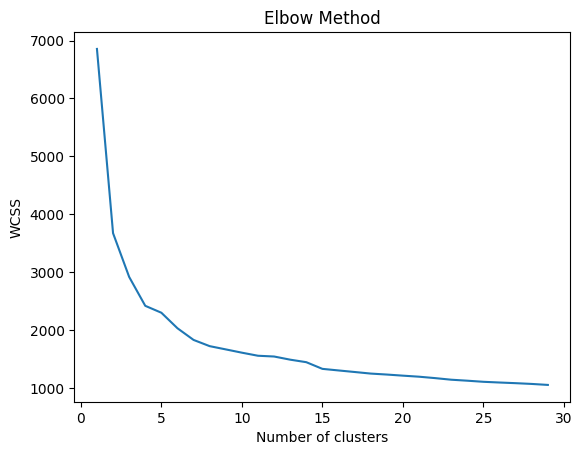

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

random_state = 55

# Dropping the non-numerical column
df = customer_level_features.drop('customer_unique_id', axis=1)

# Normalizing the data
# scaler = StandardScaler()
# df_normalized = scaler.fit_transform(df)

# Normalizing the data with MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# Elbow Method to find the optimal number of clusters
wcss = []
max_clusters = 30
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=random_state)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


2. Choose the Right Number of Clusters
- The WCSS (Within-Cluster Sum of Squares) decreases rapidly until **around 5 clusters**, after which the rate of decrease is slower and steadier. 
- This suggests that choosing a number of clusters around 5 could be a good starting point, 

3. Build the Clustering Model
- K-means Clustering: Apply K-means clustering to the data. Use number of clusters based on the previous step.

In [117]:
cluster_number = 4

# Applying K-means clustering
kmeans = KMeans(n_clusters=cluster_number, random_state=random_state, n_init='auto')
segments = kmeans.fit_predict(df_normalized)

# Adding the cluster labels to your original DataFrame
customer_level_features['Segment'] = segments

# Save the DataFrame to csv
customer_level_features.to_csv('./cache/customer_segmented.csv', index=False)


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt


# list all features except Cluster and customer_unique_id
features = [col for col in customer_level_features.columns if col not in ['Segment', 'customer_unique_id']]

# loop print mean, min, max of each features by cluster
for feature in features:
    print(f"--- {feature} ---")
    print(customer_level_features.groupby('Segment')[feature].agg(['mean', 'std', 'min', 'max']))
    print("\n")


--- purchase_frequency ---
             mean       std  min  max
Segment                              
0        1.030368  0.189507    1    7
1        1.026056  0.173368    1    6
2        1.036701  0.230791    1   15
3        1.047389  0.256186    1    9


--- total_spend ---
               mean         std    min        max
Segment                                          
0        174.762696  797.496234  10.07  109328.64
1        200.247818  485.139263  10.28   45196.00
2        176.739460  438.650215   8.89   30196.00
3        435.246490  833.869783  36.67   27923.46


--- average_order_value ---
               mean         std        min       max
Segment                                             
0        128.098087  164.205902   0.765909  13666.08
1        155.285126  222.565081   1.833333   6929.31
2        132.621502  168.517398   4.242500   7273.88
3        314.683717  352.303159  36.670000   4683.78


--- average_freight_value ---
              mean        std  min     max


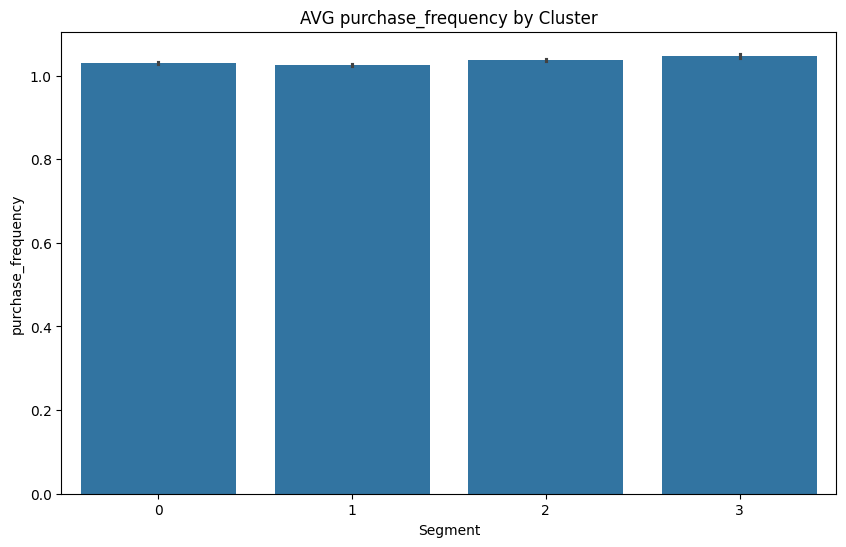

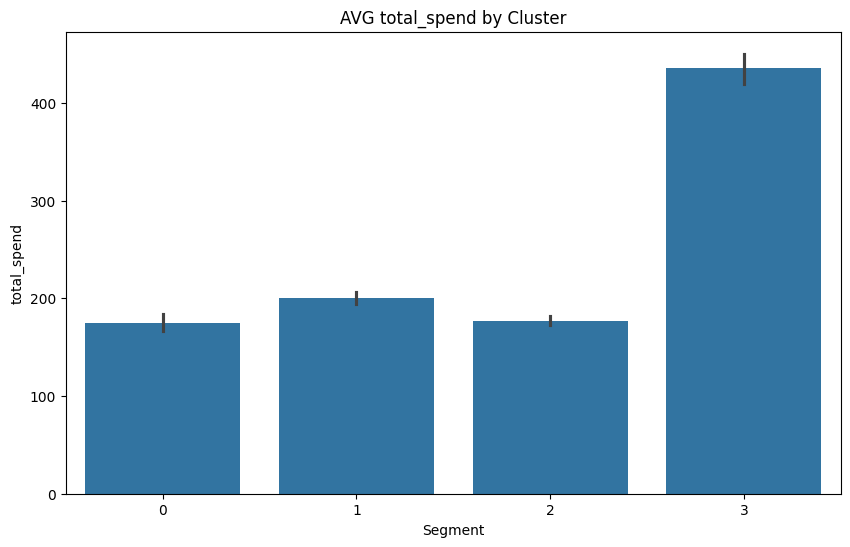

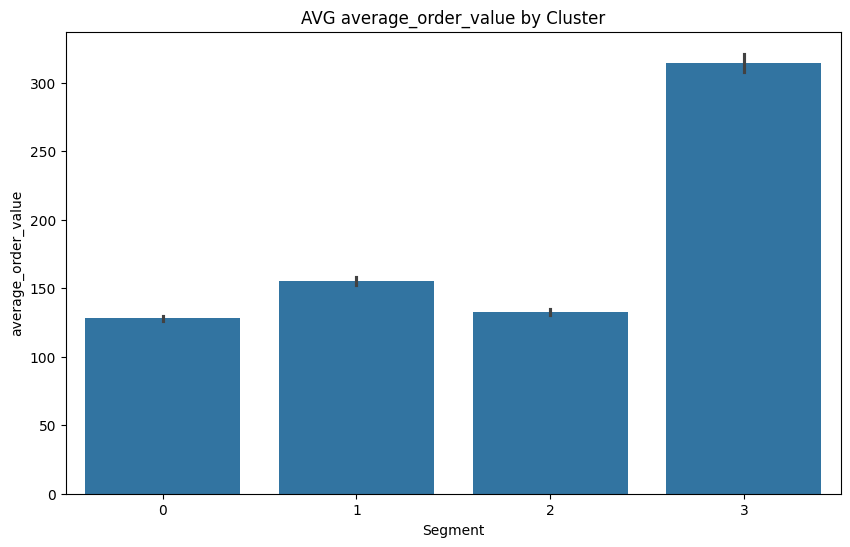

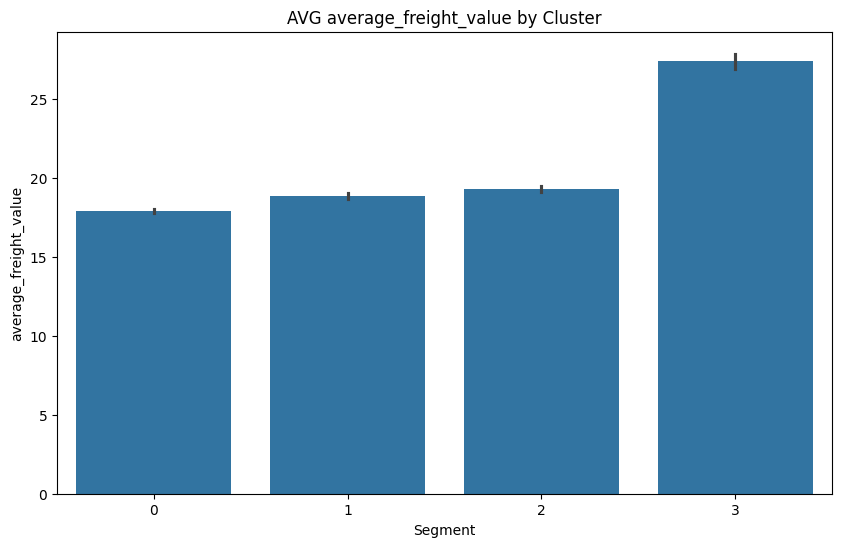

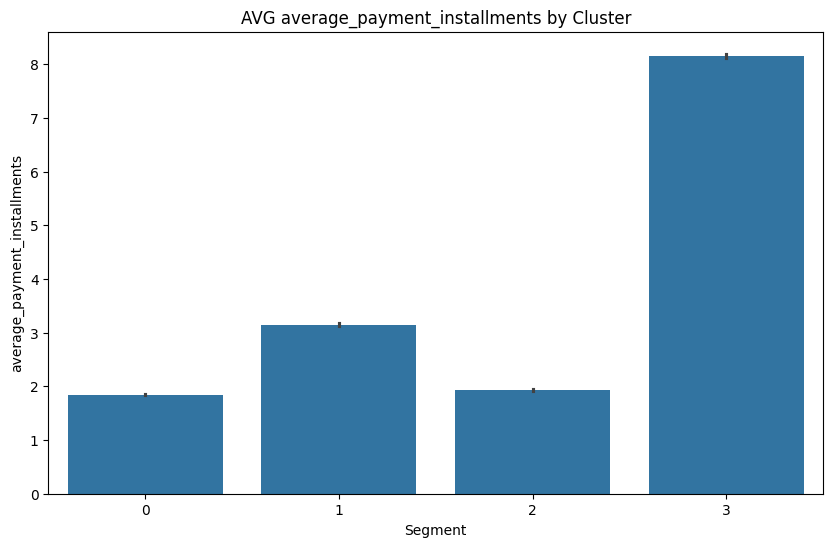

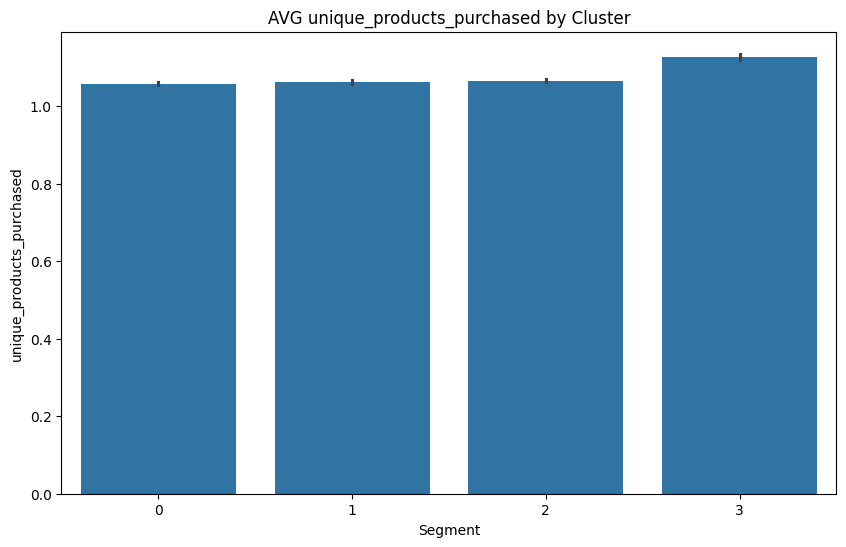

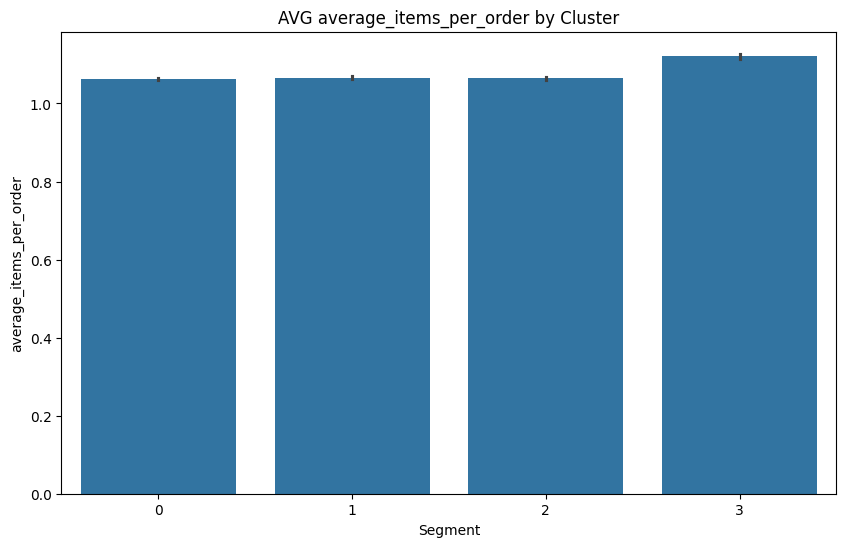

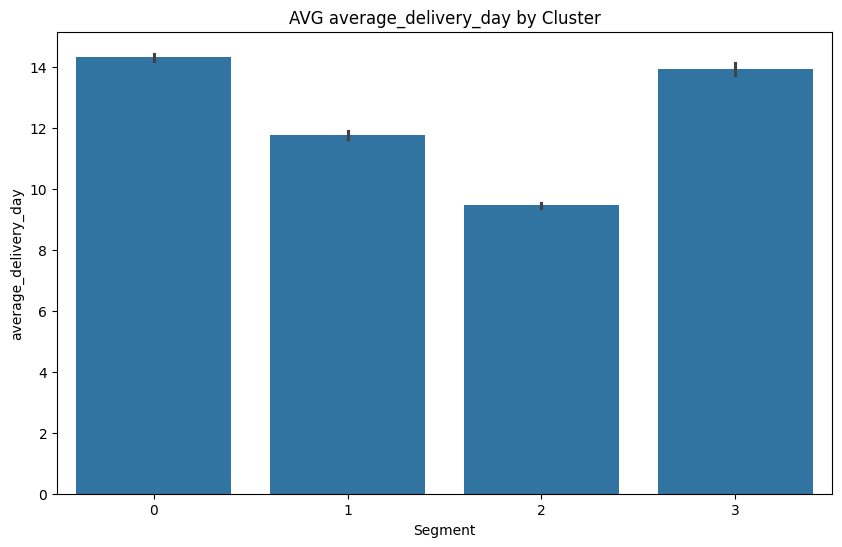

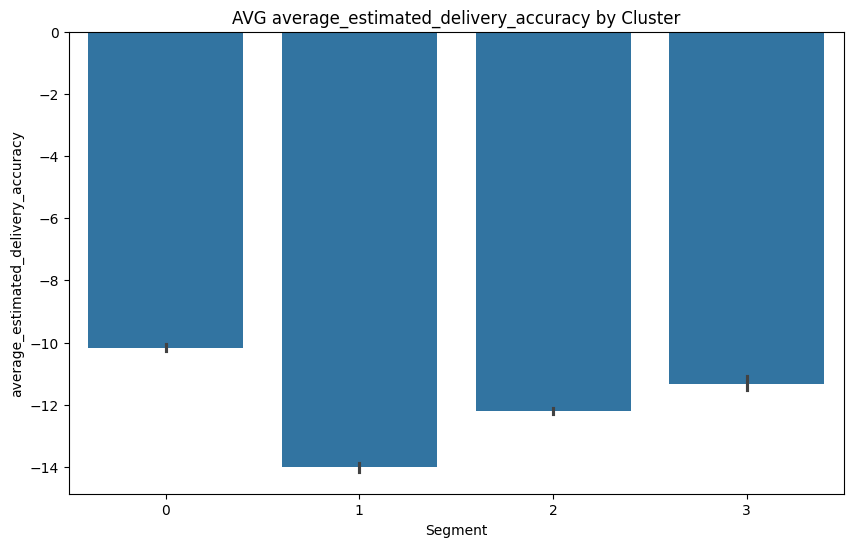

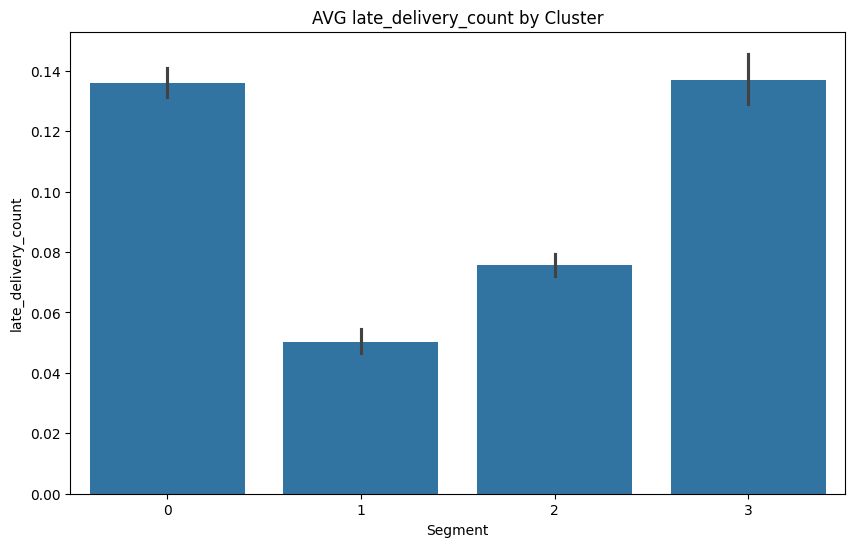

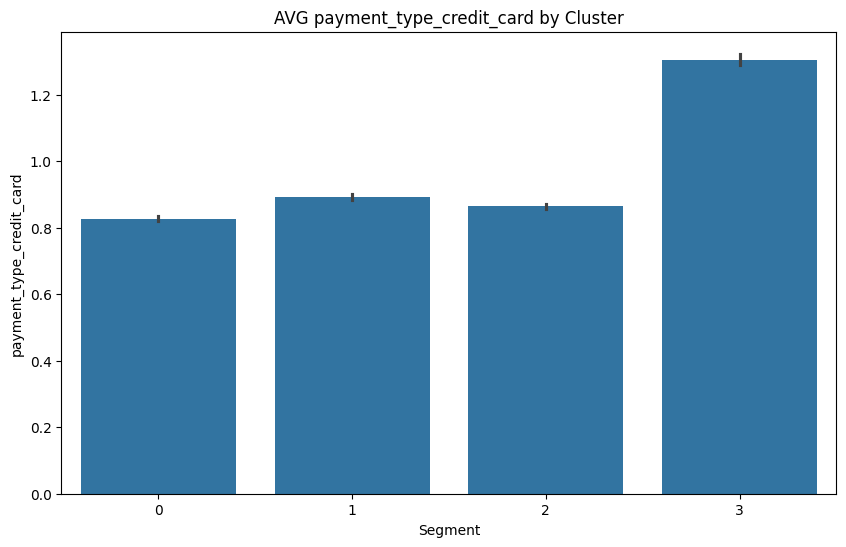

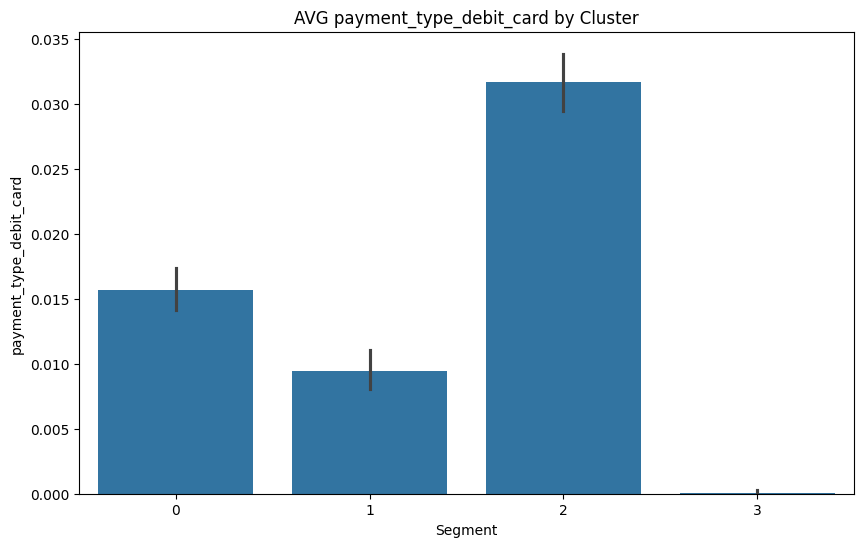

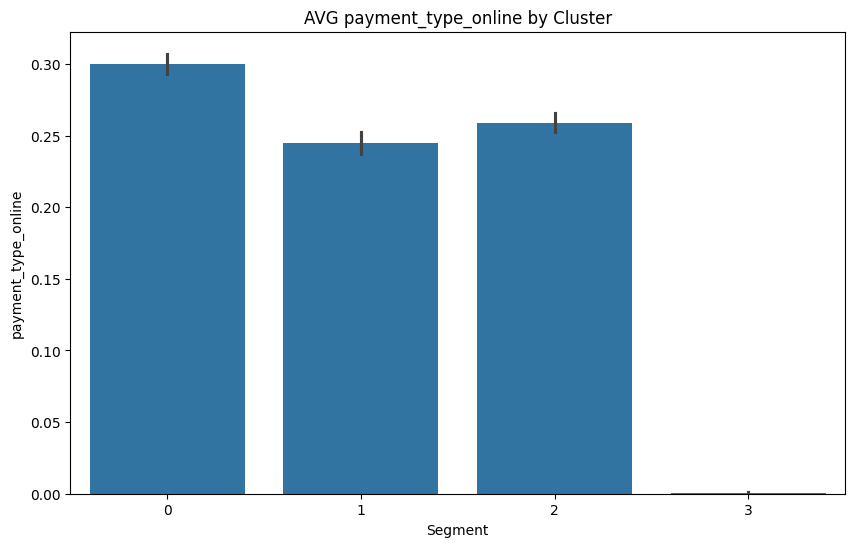

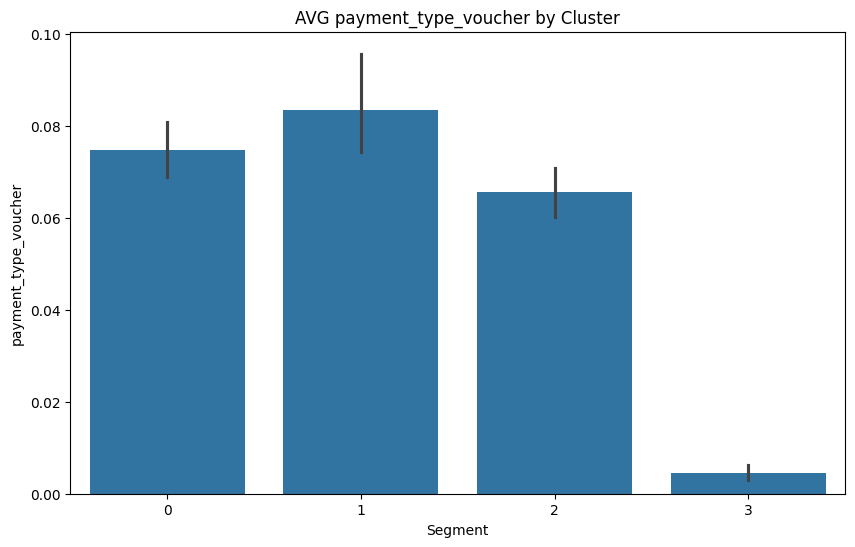

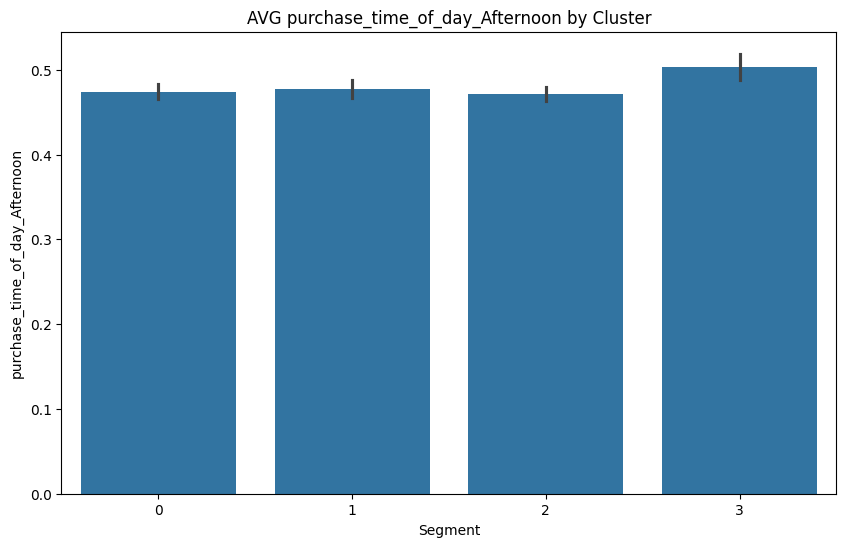

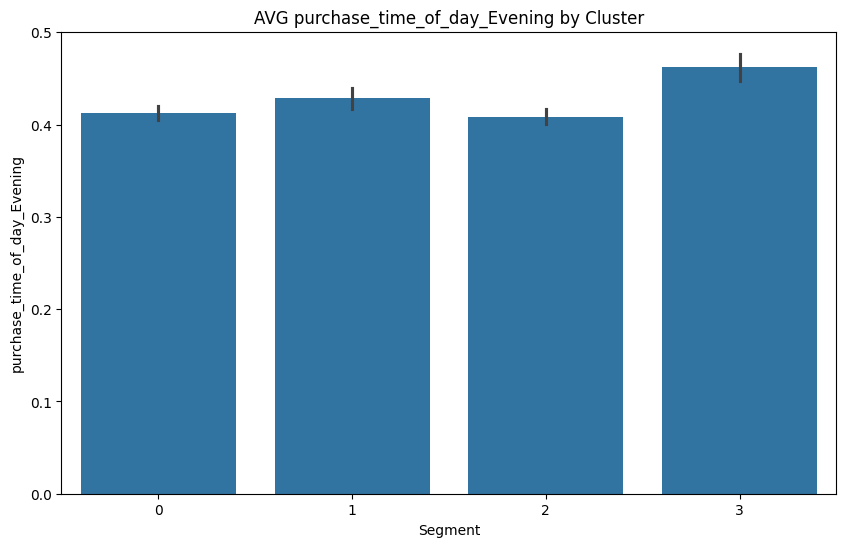

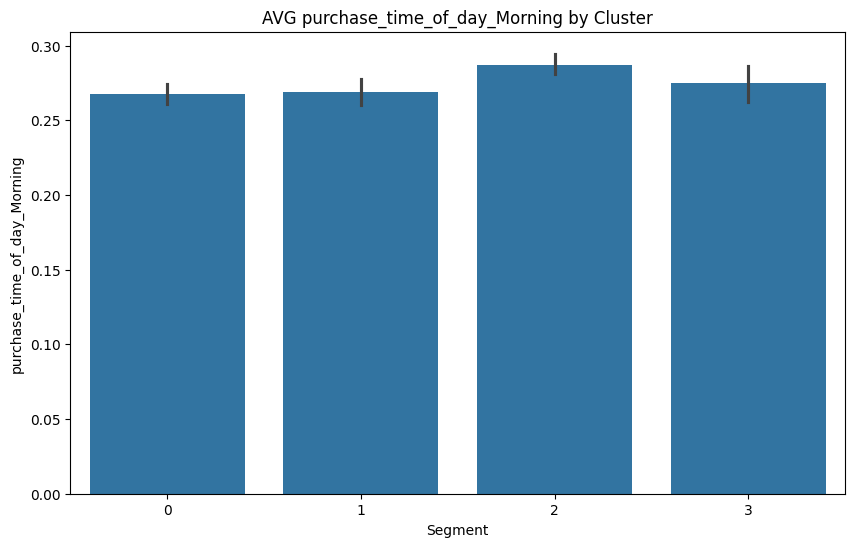

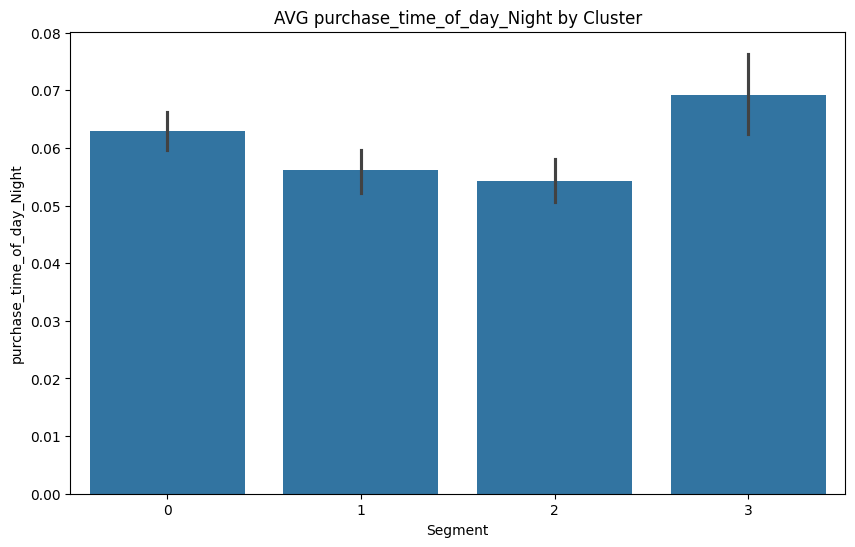

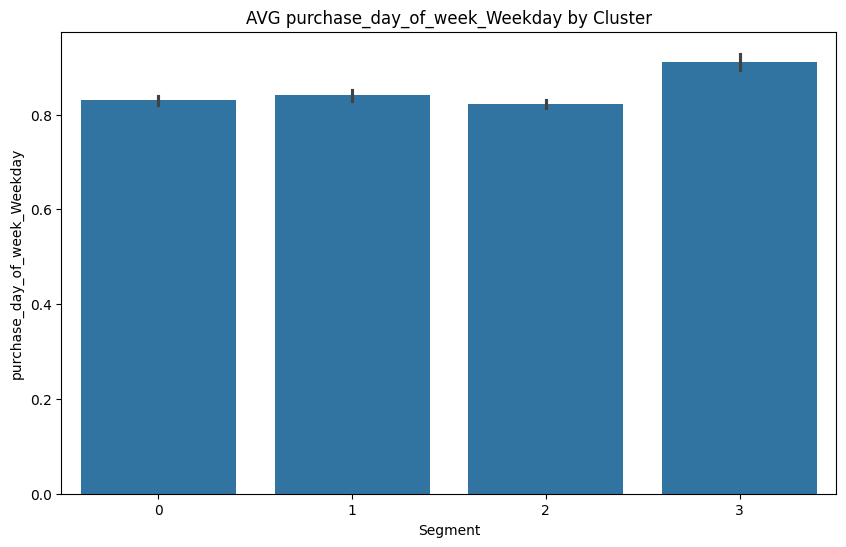

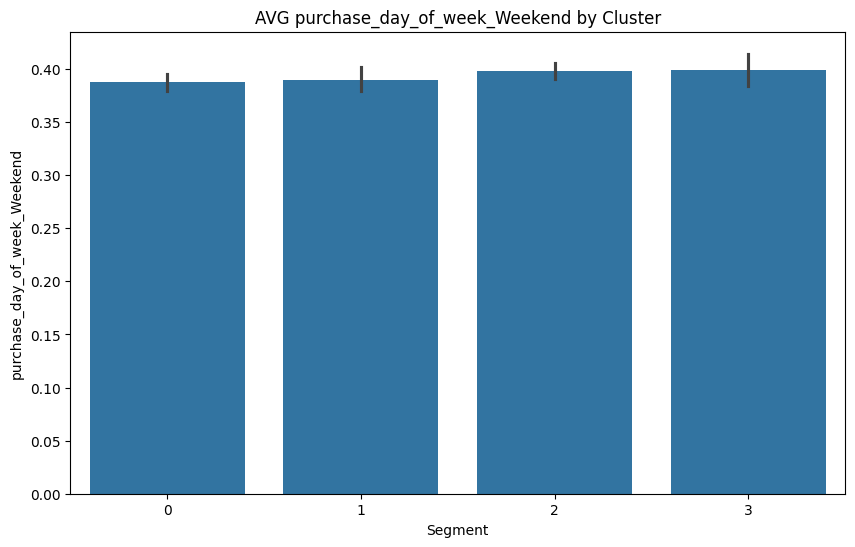

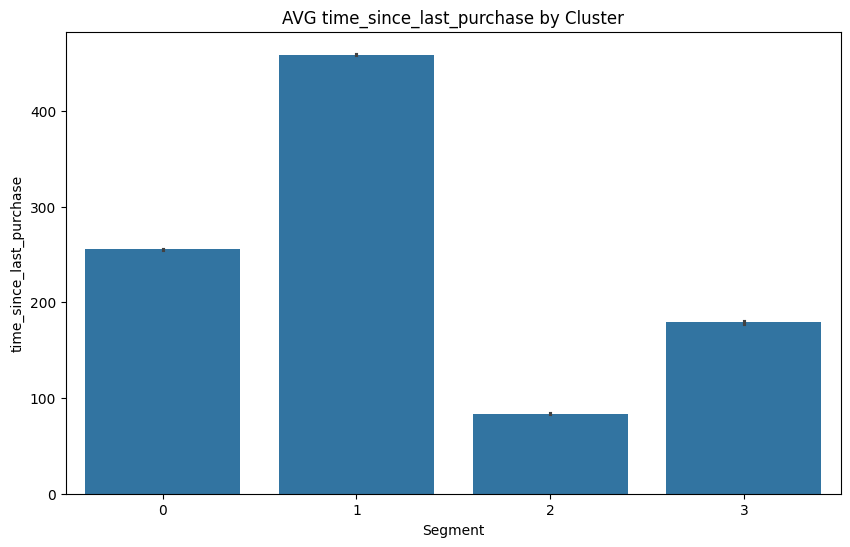

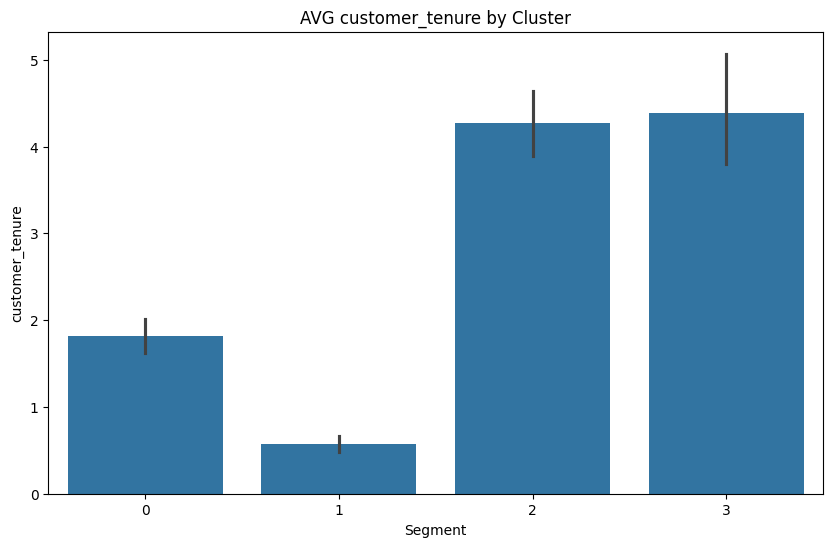

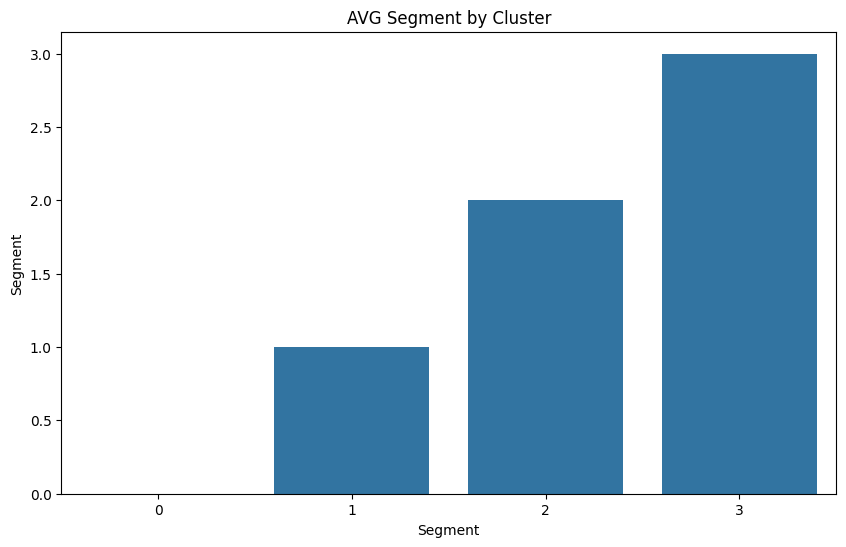

In [115]:
# Visualize the distribution of each feature by cluster
features = [col for col in customer_level_features.columns if col not in ['Cluster', 'customer_unique_id']]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Segment', y=feature, data=customer_level_features,  estimator='mean'  )
    plt.title(f'AVG {feature} by Cluster')
    plt.show()
